# Muath Hamidi | PS6

# Problem 1

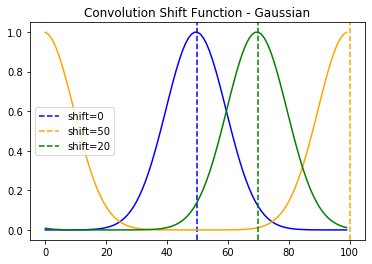

In [1]:
#==================================================
# Course: PHYS 512
# Problem: PS6 P1
#==================================================
# By: Muath Hamidi
# Email: muath.hamidi@mail.mcgill.ca
# Department of Physics, McGill University
# November 2022

#==================================================
# Libraries
#==================================================
import numpy as np # For math
import matplotlib.pyplot as plt # For graphs

#==================================================
# Shift Function
#==================================================
def Shift(Array, shift):
    DFT_Arr = np.fft.fft(Array)
    delta = np.zeros(len(Array))
    delta[shift] = 1 # This is to make sure we have the same amplitude
    DFT_del = np.fft.fft(delta)
    return np.fft.ifft(DFT_del * DFT_Arr)

#==================================================
# Plot
#==================================================
x = np.linspace(-5,5,100)
Gauss = np.exp(-0.5*x**2)

shift = 0
plt.plot(np.abs(Gauss), c="blue")
plt.axvline(len(Gauss)//2+shift, c="blue", ls = '--', label = "shift={}".format(shift))

shift = 50
plt.plot(np.abs(Shift(Gauss,shift)), c="orange")
plt.axvline(len(Gauss)//2+shift, c="orange", ls = '--', label = "shift={}".format(shift))

shift = 20
plt.plot(np.abs(Shift(Gauss,shift)), c="green")
plt.axvline(len(Gauss)//2+shift, c="green", ls = '--', label = "shift={}".format(shift))

plt.title("Convolution Shift Function - Gaussian")
plt.legend()
plt.show()


# Problem 2

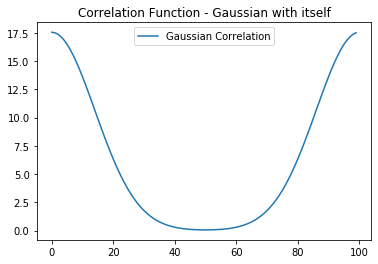

In [3]:
#==================================================
# Course: PHYS 512
# Problem: PS6 P2
#==================================================
# By: Muath Hamidi
# Email: muath.hamidi@mail.mcgill.ca
# Department of Physics, McGill University
# November 2022

#==================================================
# Libraries
#==================================================
import numpy as np # For math
import matplotlib.pyplot as plt # For graphs

#==================================================
# Shift Function
#==================================================
def Shift(Array, shift):
    DFT_Arr = np.fft.fft(Array)
    delta = np.zeros(len(Array))
    delta[shift] = 1 # This is to make sure we have the same amplitude
    DFT_del = np.fft.fft(delta)
    return np.fft.ifft(DFT_del * DFT_Arr)

#==================================================
# Part a
#==================================================
# Correlation Function
#==================================================
def Correlation(f, g):
    dft_f = np.fft.fft(f)
    dft_g = np.fft.fft(g)
    correlation = np.fft.ifft(dft_f * np.conj(dft_g))
    return correlation

#==================================================
# Plot [Correlation Function - Gaussian with itself]
#==================================================
x = np.linspace(-5,5,100)
Gauss = np.exp(-0.5*x**2)

plt.plot(np.abs(Correlation(Gauss,Gauss)), label="Gaussian Correlation")
plt.title("Correlation Function - Gaussian with itself")
plt.legend()
plt.show()


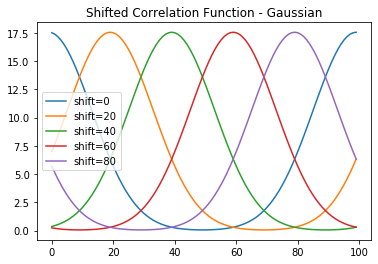

In [4]:
#==================================================
# Part b
#==================================================
# Shifted Correlation Function
#==================================================
def Shifted_Correlation(Array, shift):
    return np.fft.ifft(np.fft.fft(Array) * np.fft.fft(Shift(Array, shift)))

#==================================================
# Plot [Shifted Correlation Function - Gaussian]
#==================================================
for i in range(5):
    shift = 20 * i
    plt.plot(np.abs(Shifted_Correlation(Gauss, shift)), label="shift={}".format(shift))
plt.title("Shifted Correlation Function - Gaussian")
plt.legend()
plt.show()

# Problem 3

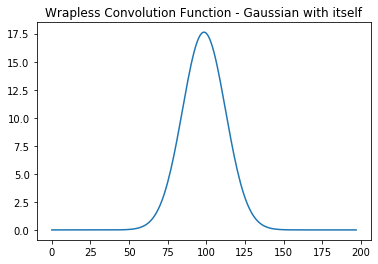

In [5]:
#==================================================
# Course: PHYS 512
# Problem: PS6 P3
#==================================================
# By: Muath Hamidi
# Email: muath.hamidi@mail.mcgill.ca
# Department of Physics, McGill University
# November 2022

#==================================================
# Libraries
#==================================================
import numpy as np # For math
import matplotlib.pyplot as plt # For graphs

#==================================================
# Wrapless Convolution Function
#==================================================
def Wrapless_Convolution(f, g):
    f_pad = np.pad(f, (0, len(g) - 1)) # f padding
    g_pad  = np.pad(g, (0, len(f) - 1)) # g padding
    return np.fft.irfft(np.fft.rfft(f_pad) * np.fft.rfft(g_pad))

#==================================================
# Plot [Wrapless Convolution Function - Gaussian with itself]
#==================================================
x = np.linspace(-5,5,100)
Gauss = np.exp(-0.5*x**2)

plt.plot(Wrapless_Convolution(Gauss,Gauss))
plt.title("Wrapless Convolution Function - Gaussian with itself")
plt.show()


# Problem 4

a)
This is a geometric series, so
\begin{equation}
\sum_{n=0}^{k} [r^k] = \frac{1 - r^{n+1}}{1-r}
\end{equation}
So, take $r=exp[-2 \pi ik/N]$, 
\begin{equation}
\sum_{x=0}^{N-1} [exp[-2 \pi ikx/N]] = \frac{1 - exp[-2 \pi ik]}{1 - exp[-2 \pi ik/N]}
\end{equation}
QED.

b)
Using L'Hôpital's rule
\begin{equation}
\lim_{k \to 0} \left[\frac{1 - exp[-2 \pi ik]}{1 - exp[-2 \pi ik/N]} \right]
= \lim_{k \to 0} \left[\frac{2 \pi i \times exp[-2 \pi ik]}{2 \pi i/N \times exp[-2 \pi ik/N]} \right]
= N
\end{equation}

If $k$ is an integer then $exp[-2 \pi ik]=1$. So, as long as $k$ is not a multiple of $N$, the sum will have $1-1=0$ on the numerator, which makes the sum vanishes (SUM=0). If $k$ is a multiple of $N$ then $exp[-2 \pi ik/N]=1$, which is problematic since the denominator will also vanish.

c)
Let the function $f(x)=sin(2𝜋𝑘$'$x/𝑁)$, So
\begin{equation}
F(x) = \sum_{x=0}^{N-1} [exp[-2 \pi ikx/N] f(x)] = Im\left[\sum_{x=0}^{N-1} [exp[-2 \pi ikx/N] exp[-2 \pi ik'x/N]]\right] = Im\left[\sum_{x=0}^{N-1} [exp[-2 \pi i(k-𝑘')x/N]]\right]
\end{equation}

Using part (a) result,

\begin{equation}
\to F(x) = Im\left[\frac{1 - exp[-2 \pi i(k-𝑘')]}{1 - exp[-2 \pi i(k-𝑘')/N]}\right]
\end{equation}

C:\Users\moath\anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


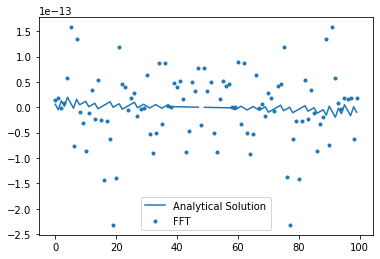

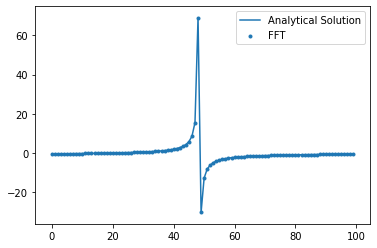

In [53]:
#==================================================
# Course: PHYS 512
# Problem: PS6 P4
#==================================================
# By: Muath Hamidi
# Email: muath.hamidi@mail.mcgill.ca
# Department of Physics, McGill University
# November 2022

#==================================================
# Libraries
#==================================================
import numpy as np # For math
import matplotlib.pyplot as plt # For graphs

#==================================================
# Shift Function
#==================================================
def Shift(Array, shift):
    DFT_Arr = np.fft.fft(Array)
    delta = np.zeros(len(Array))
    delta[shift] = 1 # This is to make sure we have the same amplitude
    DFT_del = np.fft.fft(delta)
    return np.fft.ifft(DFT_del * DFT_Arr)

#==================================================
# Part c
#==================================================
# Parameters
#==================================================
N = 100
k = np.arange(N) # k
x = np.arange(N) # x

#==================================================
# Functions
#==================================================
def F(kp):
    F = np.imag((1-np.exp(-2*1j*np.pi*(k-kp)))/(1-np.exp(-2*1j*np.pi*(k-kp)/N)))
    return F

def Sin(kp):
    sin = np.exp(2*np.pi*1j*kp*x/N)
    DFT = np.imag(np.fft.fft(sin))
    return DFT

#==================================================
# Plot
#==================================================
kp = 48 # k' integer
plt.plot(k, F(kp), label="Analytical Solution")
plt.scatter(k, Sin(kp), label="FFT", marker=".")
plt.legend()
plt.show()

kp = 48.3 # k' non-integer
plt.plot(k, F(kp), label="Analytical Solution")
plt.scatter(k, Sin(kp), label="FFT", marker=".")
plt.legend()
plt.show()

The first plot we expect to be dirac, and that what we got. Notice that in the middle we have error type: "RuntimeWarning: invalid value encountered in true_divide" since we have a major peak there indicats dirac peak. For non-integer $k'$ we will get real values.

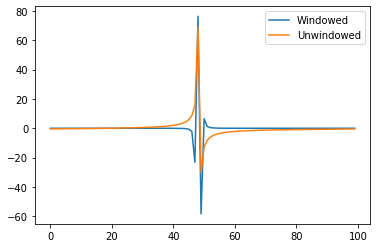

In [22]:
#==================================================
# Part d
#==================================================
# Functions
#==================================================
def Window(x):
    window = 0.5 - 0.5 * np.cos(2*np.pi*x/N)
    window = window / np.mean(window)
    return window

def NewSin():
    sin = np.exp(2*1j*np.pi*kp*x/N)
    new_sin = Window(x)*sin
    DFT = np.imag(np.fft.fft(new_sin))
    return DFT

#==================================================
# Plot
#==================================================
plt.plot(k, NewSin(), label="Windowed")
plt.plot(k, Sin(kp), label="Unwindowed")
plt.legend()
plt.show()


[ 50. -25.] -25.0


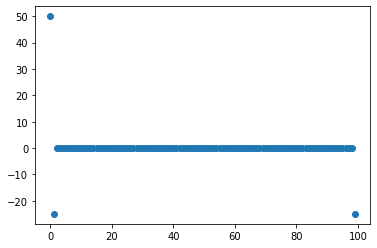

In [21]:
#==================================================
# Part e
#==================================================
# Plot
#==================================================
window = 0.5 - 0.5 * np.cos(2*np.pi*x/N)
plt.scatter(x, np.real(np.fft.fft(window)))

print(np.real(np.fft.fft(window)[:2]), np.real(np.fft.fft(window)[-1]))


As we expected, we get $N/2$ for the first element, while we get $N/4$ for the second and final element, and $0$ for the rest.

# Problem 5

In [70]:
#==================================================
# Course: PHYS 512
# Problem: PS6 P5
#==================================================
# By: Muath Hamidi
# Email: muath.hamidi@mail.mcgill.ca
# Department of Physics, McGill University
# November 2022

#==================================================
# Libraries
#==================================================
import numpy as np # For math
import matplotlib.pyplot as plt # For graphs
from numpy.fft import rfft,irfft,fftshift
import os
from os.path import join
import h5py
import json
import scipy
from scipy.optimize import curve_fit
from scipy.signal.windows import nuttall,hann,tukey,cosine,bartlett,blackman
import scipy.signal as sig

#==================================================
# Data
#==================================================
Data="./LOSC_Event_tutorial/"
events=json.load(open(join(Data,'BBH_events_v3.json')))

#==================================================
# Definitions
#==================================================
all_windows={"nuttall":nuttall,
             "hann":hann,
             "tukey":tukey,
             "cosine":cosine,
             "flat":np.ones,
             "bartlett":bartlett,
             "blackman":blackman}

#==================================================
# Functions
#==================================================
def read_template(fname):
    data_file=h5py.File(fname,'r')
    template=data_file['template']
    tp,tx=template[0],template[1]
    return tp,tx

def read_file(fname):
    data_file=h5py.File(fname,'r')
    dq_info=data_file['quality']['simple']
    qmask=dq_info['DQmask'][...]
    meta=data_file['meta']
    gps_start=meta['GPSstart'][()]
    utc=meta['UTCstart'][()]
    duration=meta['Duration'][()]
    strain=data_file['strain']['Strain'][()]
    dt=(1.0*duration)/len(strain)
    data_file.close()
    return strain,dt,utc

def PSD(array):
    window_array=window(len(array))
    array_ft=rfft(array*window_array)
    psd=np.abs(array_ft)**2
    return psd

#==================================================
# Definitions
#==================================================
window_name="tukey"
window=all_windows[window_name]
width_smooth=30 # Smoothing kernel width
ker,ker_name=hann(width_smooth),"Hann" 
smooth = lambda x:np.convolve(x, ker, "same") # Smoothing funciton


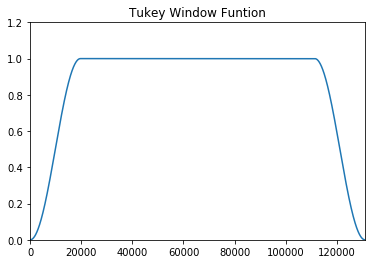

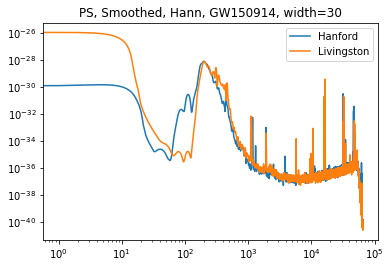

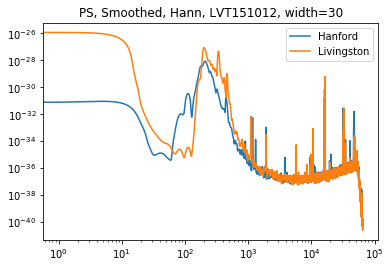

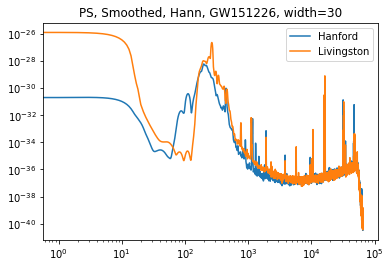

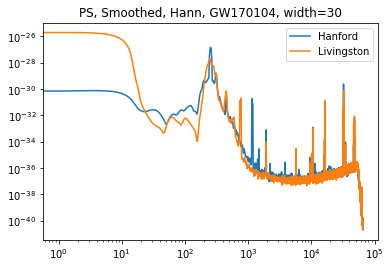

In [113]:
#==================================================
# Part a
#==================================================
# Window Function
#==================================================
# Tukey
plt.figure(figsize=(6,4))
win = sig.tukey(len(tp), alpha = .3)
plt.plot(win)
plt.title("Tukey Window Funtion")
plt.axis([0, len(tp), 0,1.2])

#==================================================
# Data & PS
#==================================================
for e in events:
    # Hanford
    strain_h,dt_h,utc_h = read_file(join(Data,events[e]['fn_H1']))
    win = window(len(strain_h))
    strain_h *= win
    psd_h = PSD(strain_h) # Hanford PS
    
    # Livingston
    strain_l,dt_l,utc_l = read_file(join(Data,events[e]['fn_L1']))
    strain_l *= win 
    psd_l=PSD(strain_l) # Livingston PS

#==================================================
# Plot PS
#==================================================
    plt.figure(figsize=(6,4))
    plt.loglog(smooth(psd_h),label="Hanford")
    plt.loglog(smooth(psd_l),label="Livingston")
    plt.title("PS, Smoothed, {}, {}, width={}".format(ker_name,e,width_smooth))
    plt.legend()
    plt.show()
    

Here we used tukey window funtion since it has a flat top which helps in dealig with data.

C:\Users\moath\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


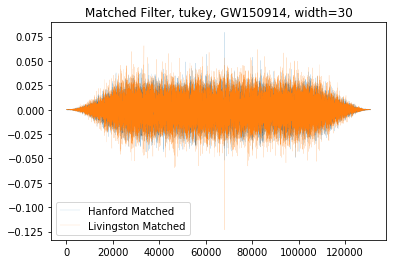

GW150914
Analytic SNR hanford=29.88221170168695, livingston=124.41117957111801, hanford+livingston=127.94955325620097
Numeric SNR hanford=7.607354720127298, livingston=9.448644758772843, hanford+livingston=12.130487773182438
Frequency weight 1/2 (Hanford): 126.875
Frequency weight 1/2 (Livingston): 114.25


C:\Users\moath\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


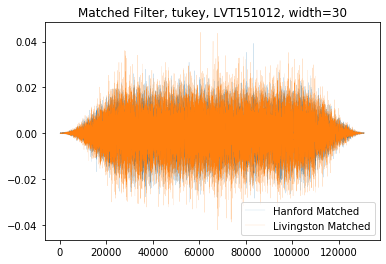

LVT151012
Analytic SNR hanford=50.694890445568994, livingston=55.07023264407915, hanford+livingston=74.85120199944181
Numeric SNR hanford=5.908827633067916, livingston=5.16858935334037, hanford+livingston=7.8503859714520035
Frequency weight 1/2 (Hanford): 121.125
Frequency weight 1/2 (Livingston): 109.59375


C:\Users\moath\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


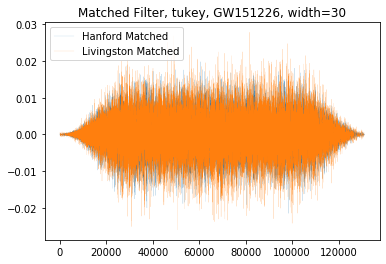

GW151226
Analytic SNR hanford=6.201837990400245, livingston=12.855422574798387, hanford+livingston=14.27321561652481
Numeric SNR hanford=5.003208413230141, livingston=5.051086899946254, hanford+livingston=7.109541004665879
Frequency weight 1/2 (Hanford): 144.03125
Frequency weight 1/2 (Livingston): 130.28125


C:\Users\moath\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


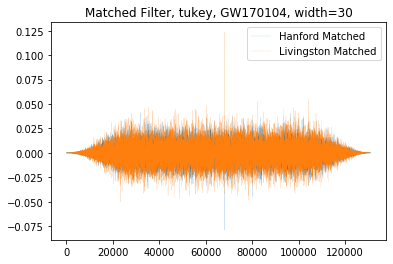

GW170104
Analytic SNR hanford=69.89009395442345, livingston=110.31870817158556, hanford+livingston=130.59419055074997
Numeric SNR hanford=9.239651341485175, livingston=11.405509627798224, hanford+livingston=14.678447015335335
Frequency weight 1/2 (Hanford): 126.125
Frequency weight 1/2 (Livingston): 113.28125


In [151]:
#==================================================
# Part b
#==================================================
# Data
#==================================================
for e in events:
    tp,tx = read_template(join(Data,events[e]['fn_template']))
    tp_win = tp*window(len(tp)) 
    tp_psd = np.abs(rfft(tp_win)**2)
    
    # Noise
    noise_h = 1/smooth(psd_h) # Hanford Noise
    noise_l = 1/smooth(psd_l) # Livingston Noise
    
    # Matched filters
    s_ft_h = np.sqrt(noise_h)*rfft(strain_h) 
    s_ft_l = np.sqrt(noise_l)*rfft(strain_l)
    tp_ft_h = np.sqrt(noise_h)*rfft(tp*window(len(tp)))
    tp_ft_l = np.sqrt(noise_l)*rfft(tp*window(len(tp)))
    
    mh = irfft(np.conj(tp_ft_h) * s_ft_h) # Hanford matched filter
    ml = irfft(np.conj(tp_ft_l) * s_ft_l) # Livingston matched filter
    
#==================================================
# Plots
#==================================================
    plt.figure(figsize=(6,4))
    plt.title("Matched Filter, {}, {}, width={}".format(window_name,e,width_smooth))
    plt.plot(fftshift(mh),linewidth=0.1,label="Hanford Matched")
    plt.plot(fftshift(ml),linewidth=0.1,label="Livingston Matched")
    plt.legend()
    plt.show()
    
#==================================================
# Part c & d
#==================================================
# Calculations SNR
#==================================================
    # Noise
    Noise_h = 2*abs(tp_ft_h@tp_ft_h)
    Noise_l = 2*abs(tp_ft_l@tp_ft_l)
        
    # SNR Analytic & Numeric
    SNR_A_h = max(abs(mh))*np.sqrt(Noise_h)
    SNR_A_l = max(abs(ml))*np.sqrt(Noise_l)
    SNR_N_h = max(abs(mh))/np.std(mh[:130000])
    SNR_N_l = max(abs(ml))/np.std(ml[:130000])
    
#==================================================
# Print SNR
#==================================================
    print("{}".format(e))
    Combined_A = np.sqrt(SNR_A_h**2+SNR_A_l**2)
    print("Analytic SNR hanford={}, livingston={}, hanford+livingston={}".format(SNR_A_h,SNR_A_l,Combined_A))
    Combined_N = np.sqrt(SNR_N_h**2+SNR_N_l**2)
    print("Numeric SNR hanford={}, livingston={}, hanford+livingston={}".format(SNR_N_h,SNR_N_l,Combined_N))

#==================================================
# Part e
#==================================================
# Data
#==================================================
    sr = 1/dt_l
    nyquist = sr/2
    freqs = np.linspace(0,nyquist,len(strain_l)//2+1)

#==================================================
# Calculations
#==================================================
    # Hanford
    tp_h = np.cumsum(abs(tp_ft_h))/sum(abs(tp_ft_h))
    freq_half_h = freqs[np.argwhere(tp_h>0.5).min()]
    print("Frequency weight 1/2 (Hanford):",freq_half_h)
    
    # Livingston
    tp_l = np.cumsum(abs(tp_ft_l))/sum(abs(tp_ft_l))
    freq_half_l = freqs[np.argwhere(tp_l>0.5).min()]
    print("Frequency weight 1/2 (Livingston):",freq_half_l)

In part (b), we used the noise model to search the four sets of events using a matched filter.
Then in part (c), we estimated the noise for each event and from the output of the matched filter, giving a signal-to-noise ratio for each event, both from the individual detectors, and from the combined Livingston + Hanford events.
In part (d), we compared the signal-to-noise we get from the scatter in the matched filter to the analytic signal-to-noise we expect from our noise model. They disagree, and the reason is most probably because of the smoothing process which gives us some spikes that made the Analytic SNR 10 times (1 order of magnitude) larger than the estimated Numeric SNR.
In part (e), we found the frequency from each event where half the weight comes from above that frequency and half below from the template and noise model.

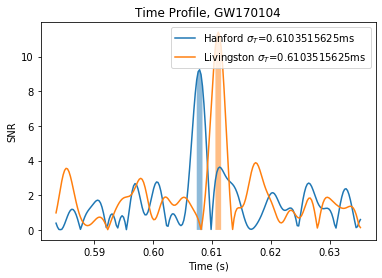

In [160]:
#==================================================
# Part f
#==================================================
# Calculations
#==================================================
for e in events:
    # Peaks
    peak_h = np.argmax(abs(mh))
    peak_l = np.argmax(abs(ml))
    minimum,maximum = min(peak_h,peak_l),max(peak_h,peak_l)
    rang = np.arange(minimum-100,maximum+100) # 'plot-range' the range of values to plot
    time = np.linspace(0,dt_l*(len(strain_h)-1),len(strain_h))
    r_time = time[rang]
    r0      = reltime[0]
    r_time-= r0
    
    # SNR
    SNR_h = abs(mh)/np.std(mh[:130000])
    SNR_l = abs(ml)/np.std(ml[:130000])
    
    # Sigma
    bin_h = np.argwhere((max(SNR_h) - SNR_h)<1.0).squeeze()
    bin_l = np.argwhere((max(SNR_l) - SNR_l)<1.0).squeeze()
    s_h = len(bin_h)*dt_h
    s_l = len(bin_l)*dt_l

#==================================================
# Plots
#==================================================
plt.figure(figsize=(6,4))
plt.title("Time Profile, {}".format(e))
plt.xlabel("Time (s)")
plt.ylabel("SNR")
plt.plot(r_time,snr_h[rang],label="Hanford $\sigma_T$={}ms".format(1000*s_h/2)) # 5000
plt.fill_between(time[bin_h]-r0,snr_h[bin_h],alpha=0.5)
plt.plot(r_time,snr_l[rang],label="Livingston $\sigma_T$={}ms".format(1000*s_l/2)) # # 5000
plt.fill_between(time[bin_l]-r0,snr_l[bin_l],alpha=0.5)
plt.legend()
plt.show()


This is for the last event.